In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import time
import json
import re
from datetime import datetime
import matplotlib.pyplot as plt
import ast

# Data Merge

In [53]:
#load WayBack Machine gp data
wbgp_data = pd.read_csv("data/gp_timestamps_batch0.csv", sep=";", index_col = "Unnamed: 0")

In [3]:
#Load response rate data from the website
xda_response_rate = pd.read_csv("data/scraped_comments.csv", sep=";", index_col = "Unnamed: 0")

In [4]:
#Load original data
product_pages = pd.read_csv("data/safe_obs_dataset.csv", sep=";", index_col = "Unnamed: 0")

In [83]:
#Load Wayback Machine XDA data
wbxda_data = pd.read_csv("data/WBdev_batch0.csv", sep=";", index_col = "Unnamed: 0")

In [57]:
wbgp_data[(wbgp_data["paid_features"]==True)|(wbgp_data["paid"]==True)].drop_duplicates(subset=["gp_url"])

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid
1,play.google.com/store/apps/details?id=eu.fairc...,http://web.archive.org/web/20201128175644/http...,20201128175644,NetGuard - no-root firewall,False,True,"1,000,000+",False,True
2,play.google.com/store/apps/details?id=com.helg...,http://web.archive.org/web/20220519073537/http...,20220519073537,Dual Camera Video Recorder,True,True,0+,False,False
3,play.google.com/store/apps/details?id=com.hb.d...,http://web.archive.org/web/20201204194737/http...,20201204194737,True Phone Dialer & Contacts & Call Recorder,True,True,"5,000,000+",False,True
4,play.google.com/store/apps/details?id=rs.pedja...,http://web.archive.org/web/20201111200810/http...,20201111200810,[ROOT] aLogcat,True,False,"100,000+",False,True
5,play.google.com/store/apps/details?id=com.morn...,http://web.archive.org/web/20220518200618/http...,20220518200618,Warm Up Exercises and training,True,False,"10,000+",False,True
...,...,...,...,...,...,...,...,...,...
4061,play.google.com/store/apps/details?id=by4a.lse...,http://web.archive.org/web/20220206044055/http...,20220206044055,Secure Storage,False,False,"5,000+",False,True
4104,play.google.com/store/apps/details?id=com.a1de...,http://web.archive.org/web/20220412010625/http...,20220412010625,A1 SD Bench,False,False,"1,000,000+",False,True
4300,play.google.com/store/apps/details?id=com.mobe...,http://web.archive.org/web/20220322094839/http...,20220322094839,"JINA: App Drawer, Sidebar & Folder Organizer",False,False,"500,000+",False,True
4322,play.google.com/store/apps/details?id=com.mira...,http://web.archive.org/web/20220426033248/http...,20220426033248,Ultra Push Ups,True,True,"5,000+",False,False


In [58]:
xda_response_rate

,url,title,main_developer_username,consumer_comm,dev_comm,dev_replies,number_comm,number_devreplies
0,/t/app-6-0-compass-of-chance.4440211/,[APP][6.0+]Compass of Chance,Baiumka,"[{'text': 'The idea sounds interesting, so may...","[{'text': ""The compass does not point to the n...",[],3.0,0.0
1,/t/app-all-root-solutions-6-0-viper4android-fx...,[APP][ALL ROOT SOLUTIONS][6.0+]ViPER4Android F...,Team_DeWitt,[{'text': 'Awesome! Works perfectly with the s...,"[{'text': ""ViPER4Android FX\n\n\n\n\n\nBy pitt...",[{'text': '\n\nshuli81 said:\n\n\n\n\t\t\tIs t...,4969.0,59.0
2,/t/app-6-0-netguard-no-root-firewall.3233012/,[APP][6.0+] NetGuard - No-root firewall,M66B,[{'text': 'So what exactly does this do sir? I...,[{'text': '\n\n\n\n\n\nNetGuard provides simpl...,[{'text': '\n\n1977theone said:\n\n\n\n\t\t\tS...,13452.0,4525.0
3,/t/app-2-2-root-wifi-reaver-gui-for-android.24...,[APP][2.2+][ROOT][WiFi] Reaver-GUI for Android,SOEDI,[{'text': 'Interesting.... nice job.\nBut bett...,[{'text': '\n\n\n\n\nReaver for Android v1.30\...,[{'text': '\n\nsathya said:\n\n\n\n\t\t\tthe m...,1518.0,76.0
4,/t/app-11-dual-camera-video-recorder.4447581/,[APP][11+] Dual Camera Video Recorder,User848,[{'text': 'Works wonderfully on my s22 Ultra. ...,[{'text': 'Capture video from rear and front c...,"[{'text': ""\n\norb_selektor said:\n\n\n\n\t\t\...",15.0,5.0
...,...,...,...,...,...,...,...,...
13369,/t/facebook-app-and-chat.678652/,Facebook app and chat,tertix,"[{'text': ""It'd probably be helpful to find ou...",[{'text': 'I have try to find a real god app t...,[],6.0,0.0
13370,/t/free-apps-packet-good-apps-packet.678403/,[FREE APPS PACKET] Good apps packet.,Cypek,[{'text': 'A majority of those are paid apps. ...,"[{'text': 'eeehh... sory delete this topic',...",[],3.0,0.0
13371,/t/full-video-chatt-app-like-skype.675381/,Full Video Chatt App like skype,pyrator,[{'text': '\n\npyrator said:\n\n\n\n\t\t\tim d...,[{'text': 'im deploying soon and was wondering...,[],3.0,0.0
13372,/t/market-as-separate-app.672499/,Market as separate app,fuz1987,"[{'text': ""You could search for Market in /dat...","[{'text': 'Hey people, I rebooted my phone thi...",[],2.0,0.0


In [96]:
product_pages["googleplay_shortlink"] = product_pages["googleplay_link"].str.replace("https://","").str.strip("/")

In [97]:
product_pages

,url,title,launch_date,launch_message,external_links,main_developer_username,main_developer_page,main_developer_title,main_developer_joined,main_developer_messages,...,contrlink_2,contrlink_3,contrlink_4,contrlink_5,contrlink_6,contrlink_7,number_of_developers,nonzero_price,ext_links_ind,googleplay_shortlink
0,/t/app-6-0-compass-of-chance.4440211/,[APP][6.0+]Compass of Chance,"May 2, 2022","\nThe compass does not point to the north, but...",['https://play.google.com/store/apps/details?i...,Baiumka,/m/baiumka.12120441/,New member,"May 2, 2022",4,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.baiu...
2,/t/app-all-root-solutions-6-0-viper4android-fx...,[APP][ALL ROOT SOLUTIONS][6.0+]ViPER4Android F...,"Apr 7, 2018",\nViPER4Android FX\n\n\n\n\n\nBy pittvandewitt...,['https://labs.xda-developers.com/store/app/co...,Team_DeWitt,/m/team_dewitt.9073985/,Senior Member,"Apr 7, 2018",71,...,https://forum.xda-developers.com/member.php?u=...,https://forum.xda-developers.com/member.php?u=...,NaN,NaN,NaN,NaN,3.0,True,True,NaN
4,/t/app-6-0-netguard-no-root-firewall.3233012/,[APP][6.0+] NetGuard - No-root firewall,"Oct 25, 2015",\n\n\n\n\n\n\nNetGuard provides simple and adv...,['https://contact.faircode.eu/?product=netguar...,M66B,/m/m66b.2799345/,Recognized Developer,"Aug 1, 2010","25,652",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True,True,play.google.com/store/apps/details?id=eu.fairc...
7,/t/app-2-2-root-wifi-reaver-gui-for-android.24...,[APP][2.2+][ROOT][WiFi] Reaver-GUI for Android,"Sep 24, 2013",\n\n\n\n\n\nReaver for Android v1.30\nReaver-W...,['https://bcmon.googlecode.com/files/bcmon.apk...,SOEDI,/m/soedi.4096618/,Senior Member,"May 14, 2011",154,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,NaN
8,/t/app-11-dual-camera-video-recorder.4447581/,[APP][11+] Dual Camera Video Recorder,Today at 8:08 AM,\nCapture video from rear and front cameras at...,['https://play.google.com/store/apps/details?i...,User848,/m/user848.5214037/,Senior Member,"Apr 9, 2013",78,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.helg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38396,/t/facebook-app-and-chat.678652/,Facebook app and chat,"May 9, 2010",\nI have try to find a real god app to faceboo...,[],tertix,/m/tertix.2493520/,New member,"Apr 11, 2010",4,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,NaN
38406,/t/free-apps-packet-good-apps-packet.678403/,[FREE APPS PACKET] Good apps packet.,"May 9, 2010",\neeehh... sory delete this topic\n \n,[],Cypek,/m/cypek.2556290/,New member,"May 6, 2010",3,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,NaN
38415,/t/full-video-chatt-app-like-skype.675381/,Full Video Chatt App like skype,"May 4, 2010",\nim deploying soon and was wondering if anyon...,[],pyrator,/m/pyrator.1603376/,Senior Member,"Feb 28, 2009",307,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,NaN
38435,/t/market-as-separate-app.672499/,Market as separate app,"Apr 29, 2010","\nHey people, I rebooted my phone this morning...",[],fuz1987,/m/fuz1987.2336665/,Member,"Feb 3, 2010",20,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,NaN


In [98]:
product_pages[product_pages["googleplay_shortlink"].str.contains("dialer")==True]

,url,title,launch_date,launch_message,external_links,main_developer_username,main_developer_page,main_developer_title,main_developer_joined,main_developer_messages,...,contrlink_2,contrlink_3,contrlink_4,contrlink_5,contrlink_6,contrlink_7,number_of_developers,nonzero_price,ext_links_ind,googleplay_shortlink
3948,/t/app-jb-2018-09-06-color-dialer-lollipop-kit...,"[APP JB+][2018-09-06]Color Dialer (Lollipop, K...","Nov 21, 2013",\nUSE THIS APP AT YOUR OWN RISK !!!\n\nThis is...,['https://play.google.com/store/apps/details?i...,kamma,/m/kamma.319765/,Senior Member,"Jul 9, 2006",820,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=cz.kamma...
4711,/t/app-3-0-appdialer-fastest-app-launcher-80-o...,[APP][3.0+] AppDialer–fastest app launcher! 80...,"Aug 28, 2012",\n\n\n\n\nSearch apps/contacts on device never...,['https://play.google.com/store/apps/details?i...,piligrimm,/m/piligrimm.789348/,Senior Member,"Jan 17, 2008",123,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=name.pil...
8297,/t/app-4-1-reactiv-dialer-fast-lightweight-sma...,"[App][4.1+] Reactiv Dialer - Fast, lightweight...","Aug 21, 2014","\nFast, lightweight and multilingual T9 smart ...",['https://play.google.com/store/apps/details?i...,Phat7,/m/phat7.660947/,Senior Member,"Oct 24, 2007",296,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.reac...
8930,/t/app-4-0-old-phone-rotary-dialer.3584735/,[App] [4.0+] Old Phone Rotary Dialer,"Apr 5, 2017","\nHello,\n\nI create that thread to present yo...",['https://play.google.com/store/apps/details?i...,sylsau,/m/sylsau.4331883/,Recognized Developer,"Nov 8, 2011",976,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.ssau...
10303,/t/fast-dialer-1-click-on-image-dialing-app.35...,Fast Dialer - 1-Click-On-Image dialing app,"Dec 7, 2016",\nhttps://play.google.com/store/apps/details?i...,['https://play.google.com/store/apps/details?i...,eyalse,/m/eyalse.5568962/,Member,"Nov 24, 2013",31,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.simp...
10380,/t/dialer-a-new-dialer-app-with-your-friends-a...,Dialer++ - a new dialer app with your friends ...,"Dec 1, 2016",\nhttps://play.google.com/store/apps/details?i...,['https://play.google.com/store/apps/details?i...,eyalse,/m/eyalse.5568962/,Member,"Nov 24, 2013",31,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.simp...
11693,/t/app-free-old-school-rotary-dialer.2509069/,[APP] [Free] Old School Rotary Dialer,"Nov 2, 2013","\nHello,\n\nSick of your boring stock keypad d...",['https://play.google.com/store/apps/details?i...,sylsau,/m/sylsau.4331883/,Recognized Developer,"Nov 8, 2011",976,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.ssau...
12130,/t/app-2-3-black-caller-screen-dialer-sustain-...,[APP][2.3+] BLACK CALLER SCREEN DIALER-sustain...,"Jul 1, 2016","\nHi folks,\n\nFinally we have some thing for ...",['https://play.google.com/store/apps/details?i...,nielpatel646,/m/nielpatel646.7442614/,Member,"Apr 30, 2016",20,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=black.ca...
12875,/t/app-2-3-enter-the-universe-of-neon-neon-os1...,[App][2.3+] Enter the universe of Neon-Neon Os...,"May 2, 2016","\nHi folks,\n\nI'm glad to present our new Dia...",['/cdn-cgi/l/email-protection#b4f9c1dfd1c7dcc2...,nielpatel646,/m/nielpatel646.7442614/,Member,"Apr 30, 2016",20,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=neon.tro...
12880,/t/app-2-3-change-ur-native-dialer-with-animat...,[app][2.3+] Change ur native dialer with anima...,"May 2, 2016","\nHi folks,\n\nI'm glad to present our new Dia...",['https://play.google.com/store/apps/details?i...,nielpatel646,/m/nielpatel646.7442614/,Member,"Apr 30, 2016",20,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=pip

In [99]:
# Merge so that each datestamp has the current data also attached
final = wbgp_data.merge(product_pages, left_on ="gp_url", right_on = "googleplay_shortlink", how ="left")

NameError: name 'wbgp_data' is not defined

## Working with Timestamps

In [63]:
final["timestamp_obj"]=final["timestamp"].astype(str)

In [64]:
final["timestamp_obj"]=final["timestamp_obj"].str[:8]

In [65]:
final[final["url"].isnull()==True]

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid,url,...,contrlink_3,contrlink_4,contrlink_5,contrlink_6,contrlink_7,number_of_developers,nonzero_price,ext_links_ind,googleplay_shortlink,timestamp_obj
3,play.google.com/store/apps/details?id=com.hb.d...,http://web.archive.org/web/20201204194737/http...,20201204194737,True Phone Dialer & Contacts & Call Recorder,True,True,"5,000,000+",False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201204
13,play.google.com/store/apps/details?id=com.anda...,http://web.archive.org/web/20210301180434/http...,20210301180434,My APK,True,False,"100,000+",False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210301
16,play.google.com/store/apps/details?id=com.zach...,http://web.archive.org/web/20201124152642/http...,20201124152642,SystemUI Tuner,False,True,"500,000+",False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201124
17,play.google.com/store/apps/details?id=com.deco...,http://web.archive.org/web/20220124091437/http...,20220124091437,Decolist - Shopping List,True,False,10+,False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220124
18,play.google.com/store/apps/details?id=rpkandro...,http://web.archive.org/web/20201108111836/http...,20201108111836,YAATA - SMS/MMS messaging,False,True,"100,000+",False,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,play.google.com/store/apps/details?id=com.luxy...,http://web.archive.org/web/20220126170040/http...,20220126170040,Luxy - USA Mature Dating App,False,False,40.+,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220126
3480,play.google.com/store/apps/details?id=it.orda....,http://web.archive.org/web/20220118232930/http...,20220118232930,PureContact,False,False,10.000+,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220118
3482,play.google.com/store/apps/details?id=com.vlvo...,http://web.archive.org/web/20210814072342/http...,20210814072342,Wasserstoffatom-Orbitale,False,False,10.000+,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210814
3502,play.google.com/store/apps/details?id=com.clou...,http://web.archive.org/web/20220327113109/http...,20220327113109,"Newton Mail - Email App for Gmail, Outlook, IMAP",True,False,1.000.000+,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220327


In [66]:
final[final["paid"]==False]

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid,url,...,contrlink_3,contrlink_4,contrlink_5,contrlink_6,contrlink_7,number_of_developers,nonzero_price,ext_links_ind,googleplay_shortlink,timestamp_obj
0,play.google.com/store/apps/details?id=com.baiu...,http://web.archive.org/web/20220426080658/http...,20220426080658,Compass of Chance: Your Dream,True,False,1+,False,False,/t/app-6-0-compass-of-chance.4440211/,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.baiu...,20220426
2,play.google.com/store/apps/details?id=com.helg...,http://web.archive.org/web/20220519073537/http...,20220519073537,Dual Camera Video Recorder,True,True,0+,False,False,/t/app-11-dual-camera-video-recorder.4447581/,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.helg...,20220519
23,play.google.com/store/apps/details?id=com.anal...,http://web.archive.org/web/20210212072811/http...,20210212072811,Real Followers & Likes on Instagram,False,True,"5,000+",False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210212
24,play.google.com/store/apps/details?id=flar2.de...,http://web.archive.org/web/20201201161315/http...,20201201161315,DevCheck Hardware and System Info,False,False,"1,000,000+",False,False,/t/app-devcheck-1-19-system-information.3171427/,...,NaN,NaN,NaN,NaN,NaN,1.0,True,True,play.google.com/store/apps/details?id=flar2.de...,20201201
27,play.google.com/store/apps/details?id=com.mira...,http://web.archive.org/web/20201124202743/http...,20201124202743,"Ultra Lock - App Lock, Photo and Video Vault",True,True,"500,000+",False,False,/t/app-4-4-ultra-lock-an-app-lock-with-innovat...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.mira...,20201124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,play.google.com/store/apps/details?id=com.heco...,http://web.archive.org/web/20220406085637/http...,20220406085637,AZ Screen Recorder - No Root,False,False,50.000.000+,False,False,/t/app-5-az-screen-recorder-no-root-full-featu...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.heco...,20220406
3516,play.google.com/store/apps/details?id=com.ssse...,http://web.archive.org/web/20220328120557/http...,20220328120557,Advanced Settings for Watch,False,False,100.000+,False,False,/t/app-root-4-4w-advanced-settings-for-watch.3...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.ssse...,20220328
3517,play.google.com/store/apps/details?id=com.hv.r...,http://web.archive.org/web/20220321100350/http...,20220321100350,Replaio: Rádio FM Online,False,False,1.000.000+,False,False,/t/app-4-0-replaio-radio-with-android-auto-and...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.hv.r...,20220321
3518,play.google.com/store/apps/details?id=kik.android,http://web.archive.org/web/20220404201328/http...,20220404201328,Kik,False,False,100.000.000+,False,False,/t/mod-4-kik-apps-clone-colored-latest-update....,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=kik.android,20220404


In [67]:
final["timestamp_obj"] = pd.to_datetime(final["timestamp_obj"], format = "%Y%m%d")

In [70]:
final_recent[final_recent["paid"]==False]

,gp_url,wb_url,timestamp,app_name,ads,paid_features,demand,demand_flag,paid,url,...,contrlink_3,contrlink_4,contrlink_5,contrlink_6,contrlink_7,number_of_developers,nonzero_price,ext_links_ind,googleplay_shortlink,timestamp_obj
0,play.google.com/store/apps/details?id=com.baiu...,http://web.archive.org/web/20220426080658/http...,20220426080658,Compass of Chance: Your Dream,True,False,1+,False,False,/t/app-6-0-compass-of-chance.4440211/,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.baiu...,2022-04-26
2,play.google.com/store/apps/details?id=com.helg...,http://web.archive.org/web/20220519073537/http...,20220519073537,Dual Camera Video Recorder,True,True,0+,False,False,/t/app-11-dual-camera-video-recorder.4447581/,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.helg...,2022-05-19
23,play.google.com/store/apps/details?id=com.anal...,http://web.archive.org/web/20210212072811/http...,20210212072811,Real Followers & Likes on Instagram,False,True,"5,000+",False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-12
24,play.google.com/store/apps/details?id=flar2.de...,http://web.archive.org/web/20201201161315/http...,20201201161315,DevCheck Hardware and System Info,False,False,"1,000,000+",False,False,/t/app-devcheck-1-19-system-information.3171427/,...,NaN,NaN,NaN,NaN,NaN,1.0,True,True,play.google.com/store/apps/details?id=flar2.de...,2020-12-01
27,play.google.com/store/apps/details?id=com.mira...,http://web.archive.org/web/20201124202743/http...,20201124202743,"Ultra Lock - App Lock, Photo and Video Vault",True,True,"500,000+",False,False,/t/app-4-4-ultra-lock-an-app-lock-with-innovat...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.mira...,2020-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,play.google.com/store/apps/details?id=com.heco...,http://web.archive.org/web/20220406085637/http...,20220406085637,AZ Screen Recorder - No Root,False,False,50.000.000+,False,False,/t/app-5-az-screen-recorder-no-root-full-featu...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.heco...,2022-04-06
3516,play.google.com/store/apps/details?id=com.ssse...,http://web.archive.org/web/20220328120557/http...,20220328120557,Advanced Settings for Watch,False,False,100.000+,False,False,/t/app-root-4-4w-advanced-settings-for-watch.3...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.ssse...,2022-03-28
3517,play.google.com/store/apps/details?id=com.hv.r...,http://web.archive.org/web/20220321100350/http...,20220321100350,Replaio: Rádio FM Online,False,False,1.000.000+,False,False,/t/app-4-0-replaio-radio-with-android-auto-and...,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=com.hv.r...,2022-03-21
3518,play.google.com/store/apps/details?id=kik.android,http://web.archive.org/web/20220404201328/http...,20220404201328,Kik,False,False,100.000.000+,False,False,/t/mod-4-kik-apps-clone-colored-latest-update....,...,NaN,NaN,NaN,NaN,NaN,1.0,False,True,play.google.com/store/apps/details?id=kik.android,2022-04-04


In [69]:
final_recent = final[final["timestamp_obj"]>pd.Timestamp(2020, 1, 1)]

In [71]:
final_recent = final_recent.dropna(subset=["url"])

In [ ]:
date_group = final_recent.groupby("url").agg({'timestamp_obj': 'nunique',}).reset_index()

date_group.columns = ['url', 'num_unique_timestamp_obj']


In [ ]:
date_group

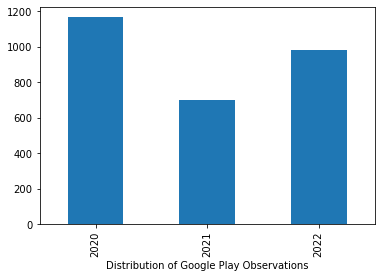

In [91]:
final_recent["url"].groupby(final_recent["timestamp_obj"].dt.year).count().plot(kind="bar").set_xlabel("Distribution of Google Play Observations")
plt.savefig('figures/dist_gp.jpg',dpi=400) 
plt.show()

In [ ]:
final_recent["year"] = [int(x.year) for x in final_recent["timestamp_obj"]]
final_recent["month"] = [int(x.month) for x in final_recent["timestamp_obj"]]
final_recent = final_recent.sort_values(by=['year', "month"],ascending=True)
final_recent["mon_year"] = final_recent["year"].astype(str) +' ' + final_recent["month"].astype(str)
final_recent["mon_year"]

In [ ]:
final_recent["url"].groupby(final_recent["mon_year"]).count().plot(kind="bar")

In [ ]:
out = final_recent.drop_duplicates(subset=["url"])[["gp_url", "url", "app_name", "launch_date", "title", "main_developer_page", "googleplay_link"]]

In [ ]:
out.to_csv("data/full_gp_data.csv", sep = ";")

## Merge with old Developer Data

In [84]:
wbxda_data

,developer_url,timestamp,url,developer_xp,developer_achievements,developer_level,developer_title,developer_messages,developer_reactions
0,m/vishnu-pv.5212005,20201205001500,http://web.archive.org/web/20201205001500/http...,0.0,8.0,25.0,Recognized Themer,1182.0,2078.0
1,m/movm.5674062,20201219142415,http://web.archive.org/web/20201219142415/http...,0.0,17.0,21.0,Senior Member,388.0,62.0
2,m/epicskunk.8154164,20201220155557,http://web.archive.org/web/20201220155557/http...,0.0,22.0,4.0,Member,11.0,0.0
3,m/ajftl.2464901,20201225075537,http://web.archive.org/web/20201225075537/http...,0.0,30.0,30.0,Senior Member,2160.0,135.0
4,m/gyebro.4629334,20201219173848,http://web.archive.org/web/20201219173848/http...,0.0,6.0,23.0,Senior Member,124.0,471.0
...,...,...,...,...,...,...,...,...,...
12019,m/caliban666.4513035,20220508194756,http://web.archive.org/web/20220508194756/http...,14571.0,82.0,38.0,Senior Member,6846.0,4340.0
12020,m/mpiero11.5489276,20220123163642,http://web.archive.org/web/20220123163642/http...,4996.0,16.0,25.0,Senior Member,152.0,32.0
12021,m/ale82to.5809883,20220126235610,http://web.archive.org/web/20220126235610/http...,6481.0,28.0,28.0,Senior Member,378.0,79.0
12022,m/zackptg5.6037748,20220213095503,http://web.archive.org/web/20220213095503/http...,12611.0,59.0,36.0,Recognized Developer,4109.0,6852.0


In [85]:
wbxda_data["timestamp_obj"]=wbxda_data["timestamp"].astype(str)

In [86]:
wbxda_data["timestamp_obj"]=wbxda_data["timestamp_obj"].str[:8]

In [87]:
wbxda_data["timestamp_obj"] = pd.to_datetime(wbxda_data["timestamp_obj"], format = "%Y%m%d")

In [88]:
wbxda = wbxda_data[wbxda_data["timestamp_obj"]>"2020-01-01"]

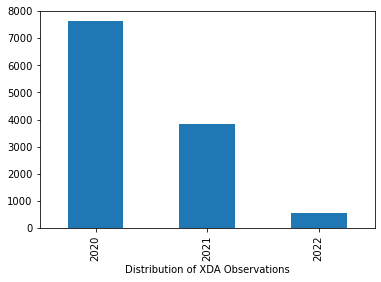

In [89]:
wbxda_data["url"].groupby(wbxda_data["timestamp_obj"].dt.year).count().plot(kind="bar").set_xlabel("Distribution of XDA Observations")
plt.savefig('figures/dist_xda.jpg',dpi=400) 
plt.show()

In [90]:
wbxda["wburl_dev"] = wbxda["url"]

In [91]:
wbxda = wbxda.drop("url", axis =1 )

In [92]:
wbxda["year"] = [int(x.year) for x in wbxda["timestamp_obj"]]
wbxda["month"] = [int(x.month) for x in wbxda["timestamp_obj"]]
wbxda = wbxda.sort_values(by=['year', "month"],ascending=True)
wbxda["mon_year"] = wbxda["year"].astype(str) +' ' + wbxda["month"].astype(str)

<AxesSubplot:xlabel='mon_year'>

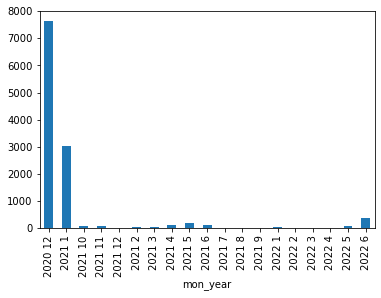

In [93]:
wbxda["wburl_dev"].groupby(wbxda["mon_year"]).count().plot(kind="bar")

In [94]:
final_recent["main_developer_page"] = final_recent["main_developer_page"].str.strip("/")

NameError: name 'final_recent' is not defined

In [95]:
#add separated time periods
#final_recent.loc[(final_recent["timestamp_obj"]<pd.Timestamp(2020, 7, 1)), "time_period_gp"] = 1
#final_recent.loc[(final_recent["timestamp_obj"]>=pd.Timestamp(2020, 7, 1))&(final_recent["timestamp_obj"]<pd.Timestamp(2021, 1, 1)), "time_period_gp"] = 2
#final_recent.loc[(final_recent["timestamp_obj"]>=pd.Timestamp(2021, 1, 1))&(final_recent["timestamp_obj"]<pd.Timestamp(2021, 7, 1)), "time_period_gp"] = 3
#final_recent.loc[(final_recent["timestamp_obj"]>=pd.Timestamp(2021, 7, 1))&(final_recent["timestamp_obj"]<pd.Timestamp(2022, 1, 1)), "time_period_gp"] = 4
#final_recent.loc[(final_recent["timestamp_obj"]>=pd.Timestamp(2022, 1, 1)), "time_period_gp"] = 5

In [ ]:
#add separated time periods
#wbxda.loc[(wbxda["timestamp_obj"]>=pd.Timestamp(2020, 1, 1))&(wbxda["timestamp_obj"]<pd.Timestamp(2020, 7, 1)), "time_period_xda"] = 1
#wbxda.loc[(wbxda["timestamp_obj"]>=pd.Timestamp(2020, 7, 1))&(wbxda["timestamp_obj"]<pd.Timestamp(2021, 1, 1)), "time_period_xda"] = 2
#wbxda.loc[(wbxda["timestamp_obj"]>=pd.Timestamp(2021, 1, 1))&(wbxda["timestamp_obj"]<pd.Timestamp(2021, 7, 1)), "time_period_xda"] = 3
#wbxda.loc[(wbxda["timestamp_obj"]>=pd.Timestamp(2021, 7, 1))&(wbxda["timestamp_obj"]<pd.Timestamp(2022, 1, 1)), "time_period_xda"] = 4
#wbxda.loc[(wbxda["timestamp_obj"]>=pd.Timestamp(2022, 1, 1)), "time_period_xda"] = 5

In [ ]:
final_recent[final_recent["time_period_gp"]==1]

In [ ]:
alldata = final_recent.merge(wbxda, left_on="main_developer_page", right_on="developer_url", how="left")

In [ ]:
alldata = alldata[alldata["timestamp_y"].isnull()==False].reset_index(drop=True)

In [ ]:
alldata["time_diff"]=alldata["timestamp_obj_x"]-alldata["timestamp_obj_y"]

In [ ]:
merged_periods = alldata[alldata["year_x"]==alldata["year_y"]]

In [ ]:
merged_periods

In [ ]:
final_data = merged_periods.loc[merged_periods.groupby(['url', "year_x"])['time_diff'].idxmin()]

In [ ]:
final_data

In [ ]:
final_data["url"].groupby(final_data["year_x"]).count().plot(kind="bar")

In [ ]:
alldata.columns

In [ ]:
alldata["time_diff"] = [x.days for x in alldata["time_diff"]]

In [ ]:
alldata["time_diff"] = abs(alldata["time_diff"])

In [ ]:
alldata

In [ ]:
alldata.loc[(alldata["timestamp_obj_x"]>"01-01-2020")&(alldata["timestamp_obj_x"]<"01-07-2020"), "time_period_gp"] = 1
alldata.loc[(alldata["timestamp_obj_x"]\leq "01-07-2020")&(alldata["timestamp_obj_x"]<"01-01-2021"), "time_period_gp"] = 2

In [ ]:
alldata[alldata["time_period_gp"]==True]

In [ ]:
close_date = alldata[abs(alldata["time_diff"])<900]

In [ ]:
unique =  close_date.drop_duplicates(subset=["url"])

In [ ]:
unique[unique["paid"]==False]

In [ ]:
#clean this up please :)

In [ ]:
final_data.drop_duplicates("url")

In [ ]:
final_data = final_data.T.drop_duplicates().T

In [ ]:
final_data = final_data.drop(['developer_achievements', 'time_period_gp', 'time_period_xda', "developer_xp", 'developer_level'], axis = 1)

In [ ]:
final_data

# Transfoming current variables into an observation from 2022

In [ ]:
product_pages["gp_url"] = product_pages["googleplay_shortlink"]
product_pages["developer_title"] = product_pages["main_developer_title"]
product_pages["timestamp_obj_x"] = pd.Timestamp(2022, 6, 10)
product_pages["mon_year_x"] = "2022 6"
product_pages["year_x"] = 2022
product_pages["month_x"] = 6
product_pages["timestamp_y"] = "20220519"
product_pages["developer_reactions"] = product_pages["main_developer_reactions"]
product_pages["developer_messages"] = product_pages["main_developer_messages"]
product_pages["wburl_dev"] = np.nan
product_pages["wb_url"] = np.nan
product_pages["timestamp_obj_y"] = pd.Timestamp(2022, 5, 19)
product_pages["month_y"] = 5
product_pages["mon_year_y"] = "2022 5"
product_pages["time_diff"] = 29
product_pages["timestamp_x"]="20220611"
product_pages["demand_flag"]=np.nan
product_pages = product_pages.drop(['contrlink_4', 'contrlink_5', 'contrlink_6', 'contrlink_7', 'googleplay_shortlink'], axis =1 )

In [ ]:
# add current demand from GP
current_demand = pd.read_csv("data/current_gp_dem.csv", sep=";", index_col="Unnamed: 0")

In [ ]:
current_demand = current_demand.drop(["app_name"], axis=1)

In [ ]:
current_new = pd.merge(product_pages, current_demand, on=["url", "gp_url", "launch_date", "title", "main_developer_page", "googleplay_link"], how="right")

In [ ]:
current_new.columns = current_new.columns.str.replace("current_", "")

In [ ]:
current_new.columns

In [ ]:
final_data.columns

In [ ]:
final_data["language_flag"]=np.nan

In [ ]:
current_new.columns.difference(final_data.columns)

In [ ]:
final_data.columns.difference(current_new.columns)

In [ ]:
final_data = final_data.reset_index(drop=True)
current_new = current_new.reset_index(drop=True)

In [ ]:
final_data = final_data[final_data["year_x"]!=2022]

In [ ]:
all_obs = pd.concat([final_data, current_new]).reset_index(drop=True)

In [ ]:
all_obs = all_obs.drop_duplicates(subset=["app_name", "year_x"])

## Adding N

In [ ]:
n_data = pd.read_csv("data/n_data.csv", sep=";", index_col="Unnamed: 0")

In [ ]:
n_data.loc[1,"mentions"]

In [ ]:
n_data.dropna(subset=["mentions"], inplace=True)

In [ ]:
n_data.loc[len(n_data["mentions"])>2, "mentions"]= [list(eval(x)) for x in n_data["mentions"] if len(x) > 2]

In [ ]:
n_data["mentions"] = n_data['mentions'].apply(ast.literal_eval)

In [ ]:
ne = n_data[n_data['mentions'].map(lambda d: len(d)) > 0]

In [ ]:
ne_dict = ne[["url", "mentions"]].to_dict(orient="records")

In [ ]:
ne_dict[0:10]

In [ ]:
for url in ne_dict:
    th_2020 =[]
    p_2020 = []
    th_2021 =[]
    p_2021 = []
    th_2022 =[]
    p_2022 = []
    for mention in url["mentions"]:
        if (mention["mention_type"]=="thread")&(re.search("2020", mention["datestamp"]) is not None):
            th_2020.append(mention)
        if (mention["mention_type"]=="post")&(re.search("2020", mention["datestamp"]) is not None):
            p_2020.append(mention)
        if (mention["mention_type"]=="thread")&(re.search("2021", mention["datestamp"]) is not None):
            th_2021.append(mention)
        if (mention["mention_type"]=="post")&(re.search("2021", mention["datestamp"]) is not None):
            p_2021.append(mention)  
        if (mention["mention_type"]=="thread")&(re.search("2022", mention["datestamp"]) is not None):
            th_2022.append(mention)
        if (mention["mention_type"]=="post")&(re.search("2022", mention["datestamp"]) is not None):
            p_2022.append(mention)
        url["th_2020"] = th_2020.copy()
        url["p_2020"] = p_2020.copy()
        url["th_2021"] = th_2021.copy()
        url["p_2021"] = p_2021.copy()
        url["th_2022"] = th_2022.copy()
        url["p_2022"] = p_2022.copy()
        url["n_p_2020"] = len(p_2020.copy())
        url["n_th_2020"] = len(th_2020.copy())
        url["n_p_2021"] = len(p_2021.copy())
        url["n_th_2021"] = len(th_2021.copy())
        url["n_p_2022"] = len(p_2022.copy())
        url["n_th_2022"] = len(th_2022.copy())

In [ ]:
open_replies = pd.DataFrame(ne_dict)

In [ ]:
pd.merge(all_obs, open_replies, on=["url", "gp_url", "launch_date", "title", "main_developer_page", "googleplay_link"], how="right")

In [ ]:
pd.melt(open_replies, id_vars=['url', "mentions"], value_vars=['th_2020', 'p_2020', 'th_2021', "p_2021", "th_2022", "p_2020",'n_p_2020', 'n_th_2020', 'n_p_2021', 'n_th_2021', 'n_p_2022', 'n_th_2022' ])

In [ ]:
open_r = pd.melt(open_replies, id_vars=['url', "mentions"], value_vars=['th_2020', 'p_2020', 'th_2021', "p_2021", "th_2022", "p_2020",'n_p_2020', 'n_th_2020', 'n_p_2021', 'n_th_2021', 'n_p_2022', 'n_th_2022' ])

In [ ]:
open_r

In [ ]:
open_r["year_x"] = open_r["variable"].str.extract(r"(\d+)")

In [ ]:
open_r

In [ ]:
open_r["variable"] = open_r["variable"].str.replace("_\d+", "")

In [ ]:
open_r

In [ ]:
open_r.insert(loc=0, column='id', value=open_r.set_index(['url','year_x']).index.factorize()[0]+1)

In [ ]:
open_r

In [ ]:
open_new = open_r.pivot(index='id', columns='variable', values='value')

In [ ]:
final_n = pd.merge(open_r, open_new, on="id", how = "left").drop(["id", "variable", "value"], axis = 1)

In [ ]:
final_n["year_x"]=final_n["year_x"].astype(int)

In [ ]:
final_n = final_n.drop_duplicates(subset=['url', 'year_x', 'n_p', 'n_th'])

In [ ]:
final_n[final_n["url"] ==final_n.loc[3586,"url"]]

In [ ]:
final_n

In [ ]:
all_n = pd.merge(all_obs, final_n, on=["url","year_x"], how="left")

In [ ]:
all_obs['year_x']

In [ ]:
all_n = all_n.reset_index(drop=True)

In [ ]:
all_n.drop_duplicates(subset = ["url","year_x"])

In [ ]:
#backup
all_n.to_csv("data/alldatawithn.csv", sep=";")

# Adding Response Rate

In [40]:
all_n = pd.read_csv("data/alldatawithn.csv", sep=";", index_col="Unnamed: 0")

In [ ]:
xda_response_rate

In [7]:
#alternative file
with open('data/xda_response_rate.json') as f:
    xda_response = json.load(f)

In [8]:
xda_rr = pd.DataFrame(xda_response)

In [9]:
xda_response.pop(196)

{'url': '/t/app-holo-whatsapp-messenger-version-2-11-150-dic-20-2013.1423124/',
 'title': '[APP][HOLO] WhatsApp Messenger Version 2.11.150 - (Dic/20/2013)',
 'main_developer_username': 'LeoPosas'}

In [10]:
xda_rr[xda_rr["consumer_comm"].isnull()==True]

,url,title,main_developer_username,consumer_comm,dev_comm,dev_replies,number_comm,number_devreplies
196,/t/app-holo-whatsapp-messenger-version-2-11-15...,[APP][HOLO] WhatsApp Messenger Version 2.11.15...,LeoPosas,NaN,NaN,NaN,NaN,NaN


In [ ]:
xda_cons = xda_response_rate[["url", "consumer_comm"]]

In [ ]:
xda_dev = xda_response_rate[["url", "dev_comm"]]

In [ ]:
xda_rep = xda_response_rate[["url", "dev_replies"]]

In [ ]:
xda_cons["consumer_comm"] = xda_cons["consumer_comm"].apply(eval)

In [ ]:
xda_response_rate["dev_comm"] = xda_response_rate['dev_comm'].apply(ast.literal_eval)

In [ ]:
xda_response_rate["dev_replies"] = xda_response_rate['dev_replies'].apply(ast.literal_eval)

In [11]:
rr_dict = xda_response_rate[["url", "consumer_comm","dev_comm","dev_replies"]].to_dict(orient="records")

In [12]:
new_response = []
for url in xda_response:
    for year in [2020, 2021, 2022]:
        response_dict={}
        response_dict["year"] = year
        response_dict["url"] = url["url"]
        cons_comments = []
        dev_comm = []
        dev_replies =[]
        
        for comm in url["consumer_comm"]:
            if (re.search(str(year), comm["date"]) is not None):
                cons_comments.append(comm)
        response_dict["cons_comm"] = cons_comments.copy()
        response_dict["n_cons"] = len(cons_comments.copy())
        
        for comm in url["dev_comm"]:
            if (re.search(str(year), comm["date"]) is not None):
                dev_comm.append(comm)
        response_dict["dev_comm"] = dev_comm.copy()
        response_dict["n_dev"] = len(dev_comm.copy())
        
        for comm in url["dev_replies"]:
            if (re.search(str(year), comm["date"]) is not None):
                dev_replies.append(comm)
        response_dict["dev_replies"] = dev_replies.copy()
        response_dict["n_rep"] = len(dev_replies.copy())
        
        new_response.append(response_dict.copy())


In [13]:
response = pd.DataFrame(new_response)

In [43]:
all_n["year_x"]

0       2020
1       2020
2       2020
3       2021
4       2020
        ... 
2024    2022
2025    2022
2026    2022
2027    2022
2028    2022
Name: year_x, Length: 2029, dtype: int64

In [44]:
#merge with full data
new = pd.merge(all_n, response, left_on= ["year_x", "url"], right_on=["year", "url"], how="left")

In [50]:
new.columns

Index(['gp_url', 'wb_url', 'timestamp_x', 'app_name', 'ads', 'paid_features',
       'demand', 'demand_flag', 'paid', 'url', 'title', 'launch_date',
       'launch_message', 'external_links', 'main_developer_username',
       'main_developer_page', 'main_developer_title', 'main_developer_joined',
       'main_developer_messages', 'main_developer_reactions', 'block_message',
       'code', 'app', 'githublink', 'github_dev', 'googleplay_link',
       'other_contributors', 'contrlink_1', 'contrlink_2', 'contrlink_3',
       'number_of_developers', 'nonzero_price', 'ext_links_ind',
       'timestamp_obj_x', 'mon_year_x', 'year_x', 'month_x', 'timestamp_y',
       'developer_title', 'developer_messages', 'developer_reactions',
       'timestamp_obj_y', 'wburl_dev', 'month_y', 'mon_year_y', 'time_diff',
       'language_flag', 'mentions', 'n_p', 'n_th', 'p', 'th', 'year',
       'cons_comm', 'n_cons', 'dev_comm', 'n_dev', 'dev_replies', 'n_rep'],
      dtype='object')

In [51]:
new[(new["n_cons"]!=0)&((new["paid"]==True)|(new["paid_features"]==True)|(new["ads"]==True))]

,gp_url,wb_url,timestamp_x,app_name,ads,paid_features,demand,demand_flag,paid,url,...,n_th,p,th,year,cons_comm,n_cons,dev_comm,n_dev,dev_replies,n_rep
31,play.google.com/store/apps/details?id=com.asks...,http://web.archive.org/web/20201111090209/http...,20201111090209,Better Wifi On/Off,True,False,"50,000+",False,True,/t/app-2-1-15-jun-2-1-better-wifi-on-off.1801284/,...,19.0,[],[{'title': 'Thread Received EMUI 11 beta on th...,2020,[{'text': 'Not working normally with S10e One ...,2,[],0,[],0
50,play.google.com/store/apps/details?id=org.vndn...,http://web.archive.org/web/20201201175248/http...,20201201175248,Phone INFO ★SAM★,True,False,"5,000,000+",False,True,/t/app-2-1-phone-info-samsung-refurbishment-ch...,...,73.0,[{'title': 'Post Questions regarding my Galaxy...,[{'title': 'Thread Is there any way to check t...,2020,[{'text': 'Looks like the product is no loger ...,24,[],0,[],0
57,play.google.com/store/apps/details?id=com.bong...,http://web.archive.org/web/20201112011743/http...,20201112011743,ApkRenamer,True,False,"100,000+",False,True,/t/app-2-2-apkrenamer-rename-your-apks.2183132/,...,0.0,[],[],2020,[{'text': 'I love this app but I hope you upda...,1,[],0,[],0
63,play.google.com/store/apps/details?id=com.bold...,http://web.archive.org/web/20201111215650/http...,20201111215650,Call Recorder (No Ads),True,True,"1,000,000+",False,True,/t/app-2-2-boldbeast-call-recorder-for-galaxy-...,...,102.0,[],[{'title': 'Thread [ROM][STABLE][Signature Spo...,2020,[{'text': ' boldbeast said: In Boldbeas...,19,[{'text': ' psvod said: Hello! What se...,15,[{'text': ' psvod said: Hello! What se...,13
64,play.google.com/store/apps/details?id=com.bold...,http://web.archive.org/web/20210116005848/http...,20210116005848,Call Recorder (No Ads),True,True,"1,000,000+",False,True,/t/app-2-2-boldbeast-call-recorder-for-galaxy-...,...,87.0,[],[{'title': 'Thread LineageOS 19.1 (Android 12L...,2021,[{'text': 'My boldbeast stopped recording 12/3...,20,[{'text': ' soljaofjesus said: Dagg.. N...,8,[{'text': ' soljaofjesus said: Dagg.. N...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,play.google.com/store/apps/details?id=com.icec...,NaN,20220611,Servers Ultimate,True,False,500K+,NaN,False,/t/app-4-0-servers-ultimate-smb-node-php-nginx...,...,5.0,NaN,[{'title': 'Thread Help with hosting a VPN ser...,2022,[{'text': ' doneg said: Just choose fro...,2,[],0,[],0
1148,play.google.com/store/apps/details?id=eu.duong...,NaN,20220611,Image & Video Date Fixer,False,True,50K+,NaN,False,/t/app-image-and-video-date-fixer-fix-your-mes...,...,NaN,NaN,NaN,2022,[{'text': 'Try Duplicate Photos Fixer to remov...,1,[],0,[],0
1394,play.google.com/store/apps/details?id=org.swif...,NaN,20220611,Swift Backup,False,True,100K+,NaN,False,/t/swift-backup-best-app-to-backup-apps-sms-ca...,...,6.0,NaN,"[{'title': 'Post Updates Thread', 'datestamp':...",2022,[{'text': 'I tried for Call backups and it wo...,3,[{'text': ' Swift Backup can backup your i...,1,[],0
1998,play.google.com/store/apps/details?id=com.marl...,NaN,20220611,Search Everything,True,False,100K+,NaN,False,/t/app-search-everything-a-faster-file-search-...,...,44.0,NaN,[{'title': 'Thread What is the go-to replaceme...,2022,[{'text': 'Greetings to all of you guys! Sorry...,2,[],0,[],0


In [52]:
new.to_csv("data/full_prelim_data.csv", sep=";")

## Stats for the full data set

In [5]:
product_pages

,url,title,launch_date,launch_message,external_links,main_developer_username,main_developer_page,main_developer_title,main_developer_joined,main_developer_messages,...,contrlink_1,contrlink_2,contrlink_3,contrlink_4,contrlink_5,contrlink_6,contrlink_7,number_of_developers,nonzero_price,ext_links_ind
0,/t/app-6-0-compass-of-chance.4440211/,[APP][6.0+]Compass of Chance,"May 2, 2022","\nThe compass does not point to the north, but...",['https://play.google.com/store/apps/details?i...,Baiumka,/m/baiumka.12120441/,New member,"May 2, 2022",4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True
2,/t/app-all-root-solutions-6-0-viper4android-fx...,[APP][ALL ROOT SOLUTIONS][6.0+]ViPER4Android F...,"Apr 7, 2018",\nViPER4Android FX\n\n\n\n\n\nBy pittvandewitt...,['https://labs.xda-developers.com/store/app/co...,Team_DeWitt,/m/team_dewitt.9073985/,Senior Member,"Apr 7, 2018",71,...,https://forum.xda-developers.com/member.php?u=...,https://forum.xda-developers.com/member.php?u=...,https://forum.xda-developers.com/member.php?u=...,NaN,NaN,NaN,NaN,3.0,True,True
4,/t/app-6-0-netguard-no-root-firewall.3233012/,[APP][6.0+] NetGuard - No-root firewall,"Oct 25, 2015",\n\n\n\n\n\n\nNetGuard provides simple and adv...,['https://contact.faircode.eu/?product=netguar...,M66B,/m/m66b.2799345/,Recognized Developer,"Aug 1, 2010","25,652",...,https://forum.xda-developers.com/member.php?u=...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True,True
7,/t/app-2-2-root-wifi-reaver-gui-for-android.24...,[APP][2.2+][ROOT][WiFi] Reaver-GUI for Android,"Sep 24, 2013",\n\n\n\n\n\nReaver for Android v1.30\nReaver-W...,['https://bcmon.googlecode.com/files/bcmon.apk...,SOEDI,/m/soedi.4096618/,Senior Member,"May 14, 2011",154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True
8,/t/app-11-dual-camera-video-recorder.4447581/,[APP][11+] Dual Camera Video Recorder,Today at 8:08 AM,\nCapture video from rear and front cameras at...,['https://play.google.com/store/apps/details?i...,User848,/m/user848.5214037/,Senior Member,"Apr 9, 2013",78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38396,/t/facebook-app-and-chat.678652/,Facebook app and chat,"May 9, 2010",\nI have try to find a real god app to faceboo...,[],tertix,/m/tertix.2493520/,New member,"Apr 11, 2010",4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True
38406,/t/free-apps-packet-good-apps-packet.678403/,[FREE APPS PACKET] Good apps packet.,"May 9, 2010",\neeehh... sory delete this topic\n \n,[],Cypek,/m/cypek.2556290/,New member,"May 6, 2010",3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True
38415,/t/full-video-chatt-app-like-skype.675381/,Full Video Chatt App like skype,"May 4, 2010",\nim deploying soon and was wondering if anyon...,[],pyrator,/m/pyrator.1603376/,Senior Member,"Feb 28, 2009",307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True
38435,/t/market-as-separate-app.672499/,Market as separate app,"Apr 29, 2010","\nHey people, I rebooted my phone this morning...",[],fuz1987,/m/fuz1987.2336665/,Member,"Feb 3, 2010",20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,True


In [15]:
response

,year,url,cons_comm,n_cons,dev_comm,n_dev,dev_replies,n_rep
0,2020,/t/app-6-0-compass-of-chance.4440211/,[],0,[],0,[],0
1,2021,/t/app-6-0-compass-of-chance.4440211/,[],0,[],0,[],0
2,2022,/t/app-6-0-compass-of-chance.4440211/,"[{'text': 'The idea sounds interesting, so may...",1,[{'text': 'The compass does not point to the n...,2,[],0
3,2020,/t/app-all-root-solutions-6-0-viper4android-fx...,[{'text': ' Joe199799 said: ...,1685,"[{'text': 'Hi thread, 2.7.1.6 is now released...",6,[{'text': ' dwinne said: Found a major ...,3
4,2021,/t/app-all-root-solutions-6-0-viper4android-fx...,[{'text': ' _mysiak_ said: I thought th...,532,[],0,[],0
...,...,...,...,...,...,...,...,...
40114,2021,/t/market-as-separate-app.672499/,[],0,[],0,[],0
40115,2022,/t/market-as-separate-app.672499/,[],0,[],0,[],0
40116,2020,/t/1-50-bank-charge-on-every-app.672213/,[],0,[],0,[],0
40117,2021,/t/1-50-bank-charge-on-every-app.672213/,[],0,[],0,[],0


In [39]:
product_pages.columns

Index(['url', 'title', 'launch_date', 'launch_message', 'external_links',
       'main_developer_username', 'main_developer_page',
       'main_developer_title', 'main_developer_joined',
       'main_developer_messages', 'main_developer_reactions', 'block_message',
       'code', 'app', 'githublink', 'github_dev', 'googleplay_link',
       'other_contributors', 'contrlink_1', 'contrlink_2', 'contrlink_3',
       'contrlink_4', 'contrlink_5', 'contrlink_6', 'contrlink_7',
       'number_of_developers', 'nonzero_price', 'ext_links_ind'],
      dtype='object')

In [62]:
dev_response = pd.merge(product_pages, response, on=["url"], how="right")

In [63]:
dev_response["launch_date"] = dev_response["launch_date"].str.replace("Today", "May 19, 2022")

In [64]:
dev_response["launch_date"] = dev_response["launch_date"].str.replace("Yesterday", "May 18, 2022")

In [65]:
dev_response["launch_date"] = dev_response["launch_date"].str.replace(",", "")

In [66]:
dev_response["launch_date"] = dev_response["launch_date"].str.replace("at 8 AM", "")

In [67]:
dev_response["launch_year"]= dev_response["launch_date"].str.replace("[^0-9 A-Za-z]", "")

C:\Users\YANAGE~1\AppData\Local\Temp/ipykernel_6216/3639118301.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dev_response["launch_year"]= dev_response["launch_date"].str.replace("[^0-9 A-Za-z]", "")


In [68]:
dev_response[dev_response["launch_date"].str.contains("AM")==True]

,url,title,launch_date,launch_message,external_links,main_developer_username,main_developer_page,main_developer_title,main_developer_joined,main_developer_messages,...,nonzero_price,ext_links_ind,year,cons_comm,n_cons,dev_comm,n_dev,dev_replies,n_rep,launch_year
12,/t/app-11-dual-camera-video-recorder.4447581/,[APP][11+] Dual Camera Video Recorder,May 19 2022 at 8:08 AM,\nCapture video from rear and front cameras at...,['https://play.google.com/store/apps/details?i...,User848,/m/user848.5214037/,Senior Member,"Apr 9, 2013",78,...,False,True,2020,[],0,[],0,[],0,May 19 2022 at 808 AM
13,/t/app-11-dual-camera-video-recorder.4447581/,[APP][11+] Dual Camera Video Recorder,May 19 2022 at 8:08 AM,\nCapture video from rear and front cameras at...,['https://play.google.com/store/apps/details?i...,User848,/m/user848.5214037/,Senior Member,"Apr 9, 2013",78,...,False,True,2021,[],0,[],0,[],0,May 19 2022 at 808 AM
14,/t/app-11-dual-camera-video-recorder.4447581/,[APP][11+] Dual Camera Video Recorder,May 19 2022 at 8:08 AM,\nCapture video from rear and front cameras at...,['https://play.google.com/store/apps/details?i...,User848,/m/user848.5214037/,Senior Member,"Apr 9, 2013",78,...,False,True,2022,[{'text': 'Works wonderfully on my s22 Ultra. ...,8,[{'text': 'Capture video from rear and front c...,7,[{'text': ' orb_selektor said: Not work...,5,May 19 2022 at 808 AM


In [69]:
dev_response["launch_year"] = dev_response["launch_date"].str.extract("(20[12][0-9])")

In [70]:
dev_response.loc[dev_response["n_dev"]>0, "pos_resp"] = 1 

In [71]:
dev_response.loc[dev_response["n_dev"]==0, "pos_resp"] = 0

In [74]:
dev_response.loc[dev_response["year"] < dev_response["launch_year"].astype(int), "pos_resp"] = np.nan

In [73]:
dev_response = dev_response[dev_response["launch_year"].isnull()==False]

In [77]:
dev_response = dev_response[dev_response["pos_resp"].isnull()==False]

In [78]:
dev_response.groupby(["year", "pos_resp"]).agg({"url":'count'})

url
year pos_resp       
2020 0.0       11408
     1.0         533
2021 0.0       11800
     1.0         405
2022 0.0       12128
     1.0         141

## Dev hierarchy in time

In [102]:
wbxda

,developer_url,timestamp,developer_xp,developer_achievements,developer_level,developer_title,developer_messages,developer_reactions,timestamp_obj,wburl_dev,year,month,mon_year
0,m/vishnu-pv.5212005,20201205001500,0.0,8.0,25.0,Recognized Themer,1182.0,2078.0,2020-12-05,http://web.archive.org/web/20201205001500/http...,2020,12,2020 12
1,m/movm.5674062,20201219142415,0.0,17.0,21.0,Senior Member,388.0,62.0,2020-12-19,http://web.archive.org/web/20201219142415/http...,2020,12,2020 12
2,m/epicskunk.8154164,20201220155557,0.0,22.0,4.0,Member,11.0,0.0,2020-12-20,http://web.archive.org/web/20201220155557/http...,2020,12,2020 12
3,m/ajftl.2464901,20201225075537,0.0,30.0,30.0,Senior Member,2160.0,135.0,2020-12-25,http://web.archive.org/web/20201225075537/http...,2020,12,2020 12
4,m/gyebro.4629334,20201219173848,0.0,6.0,23.0,Senior Member,124.0,471.0,2020-12-19,http://web.archive.org/web/20201219173848/http...,2020,12,2020 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,m/phil3759.4666971,20220602205654,18406.0,120.0,41.0,Inactive Recognized Developer,9579.0,33055.0,2022-06-02,http://web.archive.org/web/20220602205654/http...,2022,6,2022 6
11842,m/vivekkalady.1954175,20220603105214,21161.0,591.0,43.0,Inactive Recognized Developer,1432.0,1758.0,2022-06-03,http://web.archive.org/web/20220603105214/http...,2022,6,2022 6
11993,m/michyprima.628756,20220605062637,15216.0,107.0,39.0,Senior Member,1268.0,157.0,2022-06-05,http://web.archive.org/web/20220605062637/http...,2022,6,2022 6
12017,m/of2pks.7489364,20220606135252,7366.0,32.0,30.0,Senior Member,802.0,1093.0,2022-06-06,http://web.archive.org/web/20220606135252/http...,2022,6,2022 6


In [101]:
product_pages["main_developer_page"]=product_pages["main_developer_page"].str.strip("/")

In [103]:
product_pages["year"] = "2022"

In [111]:
product_pages_titles = product_pages[["developer_url", "year", "main_developer_title"]]

In [112]:
product_pages_titles.columns = product_pages_titles.columns.str.replace("main_", "")

In [110]:
product_pages["developer_url"]=product_pages["main_developer_page"]

In [113]:
product_pages_titles

,developer_url,year,developer_title
0,m/baiumka.12120441,2022,New member
2,m/team_dewitt.9073985,2022,Senior Member
4,m/m66b.2799345,2022,Recognized Developer
7,m/soedi.4096618,2022,Senior Member
8,m/user848.5214037,2022,Senior Member
...,...,...,...
38396,m/tertix.2493520,2022,New member
38406,m/cypek.2556290,2022,New member
38415,m/pyrator.1603376,2022,Senior Member
38435,m/fuz1987.2336665,2022,Member


In [115]:
titles = pd.concat([product_pages_titles, wbxda])

In [117]:
titles_new = titles.drop_duplicates(subset=["developer_url", "year"])

In [118]:
titles_new

,developer_url,year,developer_title,timestamp,developer_xp,developer_achievements,developer_level,developer_messages,developer_reactions,timestamp_obj,wburl_dev,month,mon_year
0,m/baiumka.12120441,2022,New member,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,m/team_dewitt.9073985,2022,Senior Member,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,m/m66b.2799345,2022,Recognized Developer,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
7,m/soedi.4096618,2022,Senior Member,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
8,m/user848.5214037,2022,Senior Member,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11387,m/phil3759.4666971,2022,Inactive Recognized Developer,2.022060e+13,18406.0,120.0,41.0,9579.0,33055.0,2022-06-02,http://web.archive.org/web/20220602205654/http...,6.0,2022 6
11842,m/vivekkalady.1954175,2022,Inactive Recognized Developer,2.022060e+13,21161.0,591.0,43.0,1432.0,1758.0,2022-06-03,http://web.archive.org/web/20220603105214/http...,6.0,2022 6
11993,m/michyprima.628756,2022,Senior Member,2.022061e+13,15216.0,107.0,39.0,1268.0,157.0,2022-06-05,http://web.archive.org/web/20220605062637/http...,6.0,2022 6
12017,m/of2pks.7489364,2022,Senior Member,2.022061e+13,7366.0,32.0,30.0,802.0,1093.0,2022-06-06,http://web.archive.org/web/20220606135252/http...,6.0,2022 6


In [132]:
titles_new.groupby(["year", "developer_title"]).agg({"developer_title":'count'}).head(50)

developer_title
year developer_title                                                    
2020 Active member                                                     1
     Elite Member                                                      1
     Member                                                         1225
     New member                                                      194
     Recognized Developer                                            202
     Retired Moderator                                                 1
     Senior Member                                                  2590
     Substratum Development Leader / Inactive Recognize                1
     User Experience Admin                                             1
     XDA Community Manager                                             1
     XDA Labs & Feed Dev/RD                                            1
     XDA Portal Supporter                                              1
2021 Member                                                         1297
     New member                                                      260
     Recognized Developer                                            148
     Retired Moderator                                                 1
     Senior Member                                                  1553
     Substratum Development Leader / Inactive RT                       1
     XDA Community Manager                                             1
     XDA Labs & Feed Dev/RD                                            1
2022 Member                                                          119
     New member                                                      178
     Recognized Developer                                             33
     Senior Member                                                   142
     XDA Community Manager                                             1
     XDA Portal Supporter                                              1
     Account currently disabled                                        3
     Administrator                                                     1
     Member                                                         2843
     New member                                                     1629
     Recognized Developer                                            205
     Retired Moderator                                                 1
     Senior Member                                                  3036
     Substratum Development Leader / Inactive RT                       1
     XDA Community Manager                                             1
     XDA Labs & Feed Dev/RD                                            1
     XDA Portal Supporter                                              1

In [125]:
titles_new.loc[titles_new["developer_title"].str.contains("[Rr]ecognized")==True, "developer_title"]="Recognized Developer"

C:\Users\Yana Gerina\.conda\envs\networks\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [131]:
titles_new.loc[(titles_new["developer_title"].str.contains("([Ss]enior)")==True)|(titles_new["developer_title"].str.contains("([Ff]orum)")==True), "developer_title"]="Senior Member"

C:\Users\YANAGE~1\AppData\Local\Temp/ipykernel_6216/2668200828.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  titles_new.loc[(titles_new["developer_title"].str.contains("([Ss]enior)")==True)|(titles_new["developer_title"].str.contains("([Ff]orum)")==True), "developer_title"]="Senior Member"
C:\Users\Yana Gerina\.conda\envs\networks\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
